In [8]:
import pandas as pd

df = pd.read_csv('data/ex-3-2.csv')
df

,y
0,5
1,15
2,33
3,21
4,34
...,...
95,310
96,297
97,308
98,300


<AxesSubplot:>

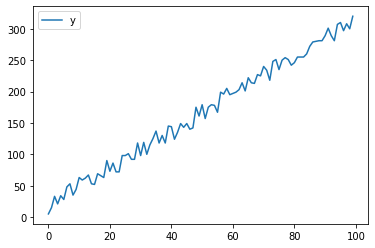

In [9]:
df.plot()

In [20]:
'''
The time series is noisy. Make the exponential smoothing of the time series with a smoothing coefficient 0.21.
Enter the smoothed value for the 15-th point of the time series (the numbering starts from 1):
'''
def EMA(df: pd.DataFrame, alpha: float):
    if alpha > 1 or alpha < 0:
        raise ValueError('0 <= alpha <= 1')
    l = [df.iloc[0].y]
    for i in range(1, len(df)):
        l.append(
            alpha * df.iloc[i].y + (1 - alpha) * l[i-1] 
        )
    df['y_EMA'] = l
    return df

def EMA_point(df: pd.DataFrame, alpha: float, element_num: int):
    if alpha > 1 or alpha < 0:
        raise ValueError('0 <= alpha <= 1')
    l = [df.iloc[0].y]
    for i in range(1, element_num):
        l.append(
            alpha * df.iloc[i].y + (1 - alpha) * l[i-1] 
        )
    return round(l[element_num - 1], 2)

print('point 15: ', EMA_point(df, 0.21, 15))
print('point 100: ', EMA_point(df, 0.21, 100))

point 15:  52.38
point 100:  301.79


<AxesSubplot:>

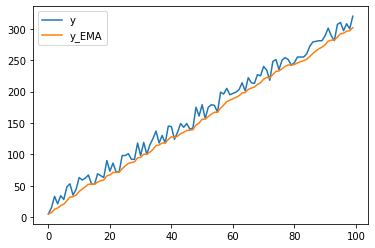

In [18]:
EMA(df, 0.21).plot()

In [30]:
'''
Make a linear trend for the input time series Y. Evaluate how well the linear trend approximates the values of the time series.
Find the coefficient a of the linear trend, specified by the equation y = ax + b:
'''
n = len(df)
a = (n * sum([(df.index[i] + 1) * df.iloc[i].y for i in range(1, n)]) - sum([(df.index[i] + 1) for i in range(1, n)]) * sum([df.iloc[i].y for i in range(1, n)])) / (n * sum([(df.index[i] + 1)**2 for i in range(1, n)]) - sum([(df.index[i] + 1) for i in range(1, n)])**2)
b = (sum([df.iloc[i].y for i in range(1, n)]) - a * sum([(df.index[i] + 1) for i in range(1, n)])) / n
df['y_trend'] = a*(df.index+1)+b

<AxesSubplot:>

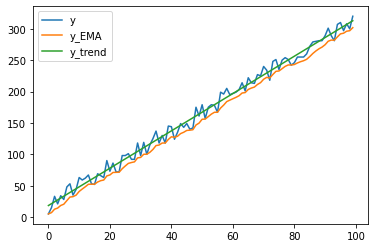

In [31]:
df.plot()

In [32]:
R2 = 1 - (sum([(df.iloc[i].y - df.iloc[i].y_trend)**2 for i in range(1, n)]))/(sum([(df.iloc[i].y - df.y.mean())**2for i in range(1, n)]))
R2

0.9891082180327396

In [33]:
a

2.9744514203717616

In [34]:
y101=a*101 + b

In [35]:
y101

315.81954124297766